In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

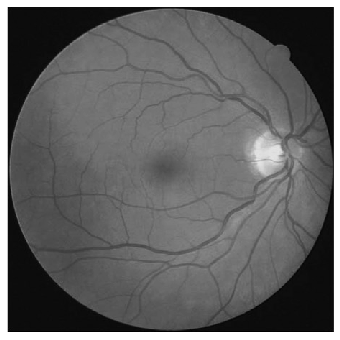

In [2]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = np.round (0.2989 * r + 0.5870 * g + 0.1140 * b)

    return gray


im2=Image.open('C:/Users/Usuario/Documents/MATLAB/PDI/im1.jpg')
im2=np.array(im2)
im2=rgb2gray(im2)
im2=im2.astype(int)
fig1=plt.figure(figsize = (6,6))
#print(im2.shape)
plt.imshow(im2, cmap='gray',vmin=0,vmax=255);
plt.axis('off');

0
255


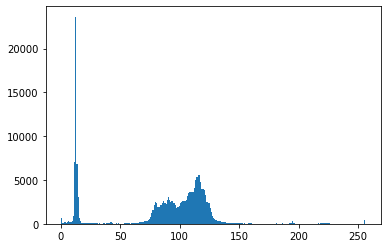

In [4]:
#b = im2.ravel();
i=np.arange(256)
mini=np.amin(im2)
print(mini)
maxi=np.amax(im2)
print(maxi)
vari=np.zeros(256)
#mc1=np.zeros(255)
#mc2=np.zeros(255)
pi, bins, bars=plt.hist(im2.ravel(), bins=256, range=(0.0, 256));
pi =pi/sum(pi)

(array([58], dtype=int64),)


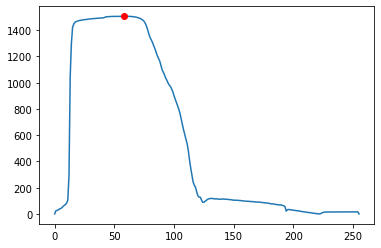

In [5]:
for k in range(mini+1, maxi):
  pc1=np.sum(pi[mini:k])
  pc2=1- pc1    
  mc1=np.inner(i[mini:k],pi[mini:k])/pc1;
  mc2=np.inner(i[k+1:maxi],pi[k+1:maxi])/pc2;
  vari[k]=pc1*pc2*((mc1-mc2)**2);   
u=np.amax(vari)
v=np.where(vari == u)
print(v)
plt.plot(i,vari);
plt.plot(v,u,'ro');
plt.show()

(array([58], dtype=int64),)


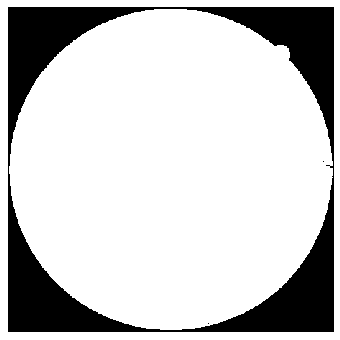

In [6]:
Iw=im2>v
Iw=Iw.astype(int);
print(v)
fig2=plt.figure(figsize = (6,6))
plt.imshow(Iw.astype(int)*255, cmap='gray',vmin=0,vmax=255);
plt.axis('off');